# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [2]:
# Create pandas dataframe from csv
df = pd.read_csv("../logs/MainLog-2_Final_2.csv", sep=",", header=0)

# Split  synthetic/complex
df_synthetic = df[df['name'].str.match('synth')]
df_complex = df[~df['name'].str.match('synth')]

# Mean
df_mean_k = df.groupby('k_optimal').mean()
df_synthetic_mean_k = df_synthetic.groupby('k_optimal').mean()
df_complex_mean_k = df_complex.groupby('k_optimal').mean()

# Style plot
plt.style.use('default')
font = {'size' : 20}
plt.rc('font', **font)

# Print results

In [5]:

dfFalse = df[df['verified'] == False]
dfError = dfFalse[dfFalse['millis'] < 180000]
print(dfError)

numSynthetic = df_synthetic.shape[0]
dfSyntheticSolved = df_synthetic[df_synthetic['verified'] == True]
numSyntheticSolved = dfSyntheticSolved.shape[0]
print("Synthetic: " + str(numSyntheticSolved) + "/" + str(numSynthetic)
      + " (" + str(numSyntheticSolved * 100 / numSynthetic if numSynthetic else 100) + "%)")

numComplex = df_complex.shape[0]
dfComplexSolved = df_complex[df_complex['verified'] == True]
numComplexSolved = dfComplexSolved.shape[0]
print("Complex: " + str(numComplexSolved) + "/" + str(numComplex)
      + " (" + str(numComplexSolved * 100 / numComplex if numComplex else 100) + "%)")

numGeneral = df.shape[0]
dfSolved = df[df['verified'] == True]
numSolved = dfSolved.shape[0]
print("Overall: " + str(numSolved) + "/" + str(numGeneral)
      + " (" + str(numSolved * 100 / numGeneral) + "%)")

Empty DataFrame
Columns: [name, k_optimal, k_solved, millis, verified, recursive_steps]
Index: []
Synthetic: 382/450 (84.88888888888889%)
Complex: 208/220 (94.54545454545455%)
Overall: 590/670 (88.05970149253731%)


# BFS Comparison

                                 name  k_optimal_x  k_solved_x  millisLight  \
0       synth-n_10-m_12-k_2-p_0.2.txt            0           0           22   
1       synth-n_10-m_12-k_2-p_0.2.txt            0           0           22   
2       synth-n_10-m_12-k_4-p_0.2.txt            1           1            0   
3       synth-n_10-m_12-k_4-p_0.2.txt            1           1            0   
4    synth-n_100-m_1009-k_2-p_0.2.txt            2           2            4   
..                                ...          ...         ...          ...   
665                 wikispeedia-n_300           23          23            1   
666                 wikispeedia-n_400           39          39            4   
667                 wikispeedia-n_500           59          59           12   
668                 wikispeedia-n_700           77          77           41   
669                 wikispeedia-n_800          110          82       180000   

     verified_x  k_optimal_y  k_solved_y  millisFul

C:\Users\lenna\AppData\Local\Temp/ipykernel_8684/3709888920.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


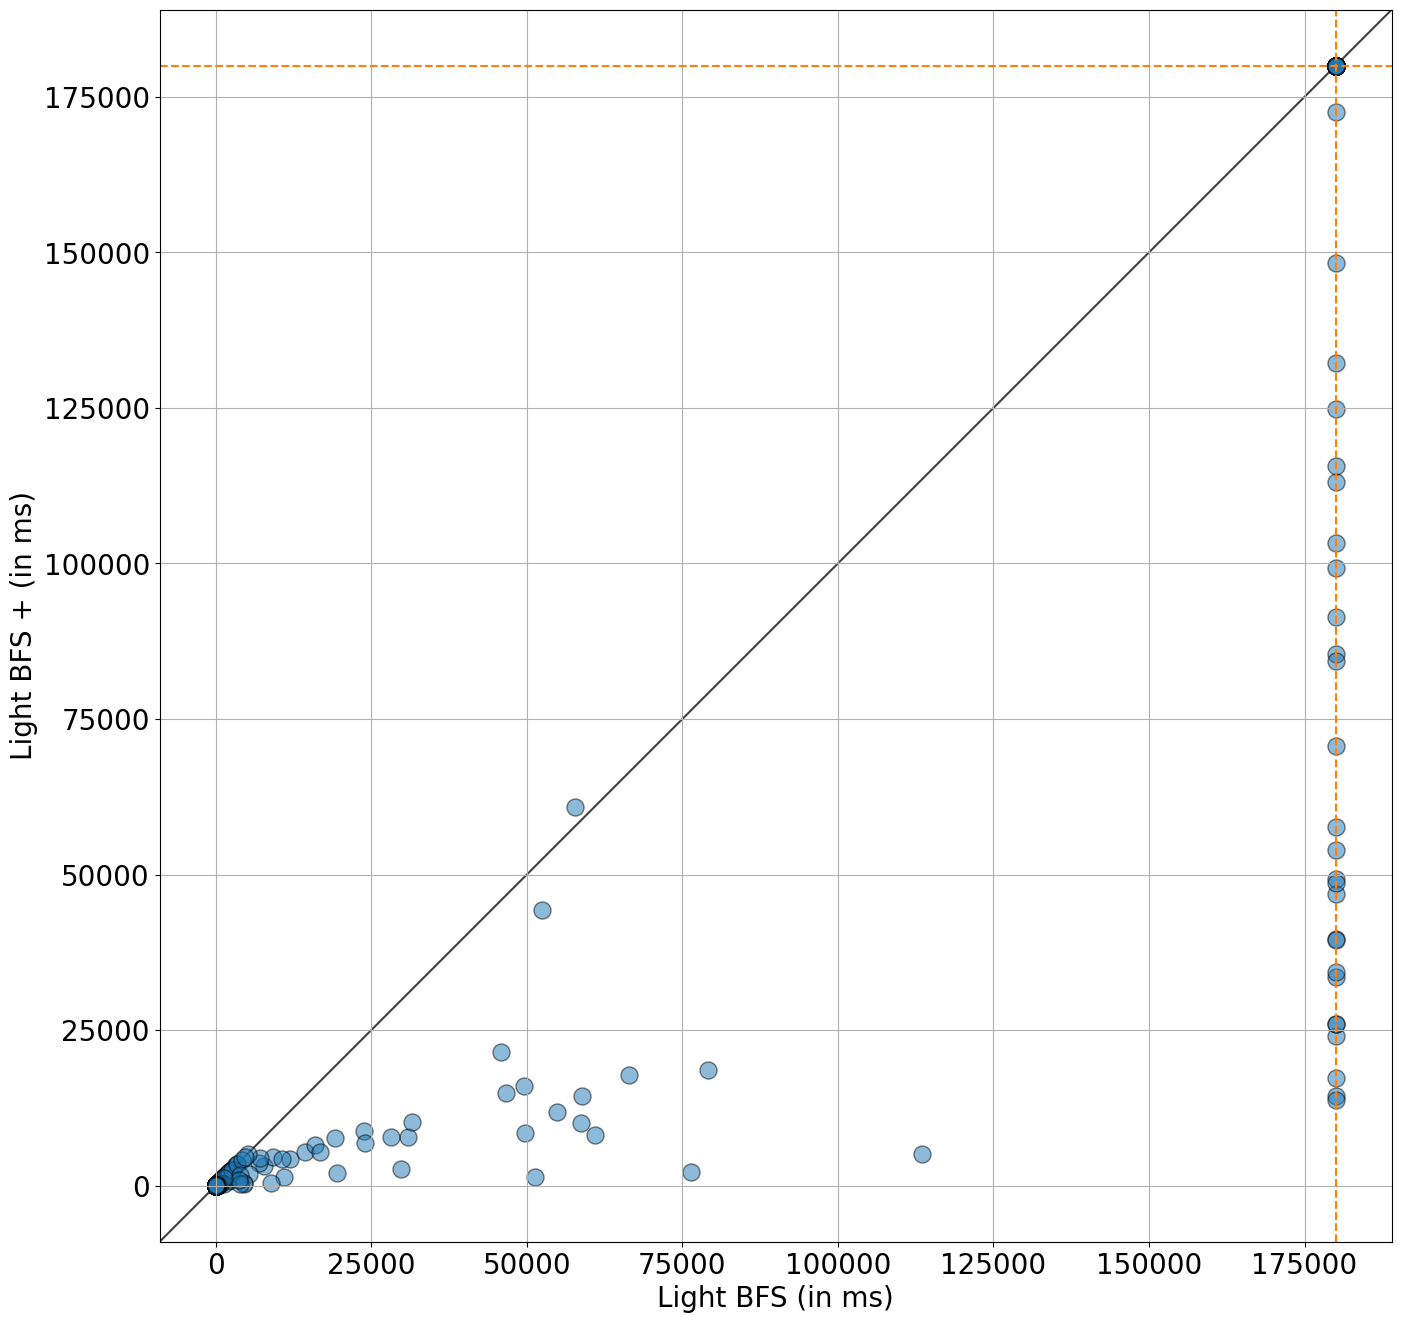

In [6]:
dfLight = pd.read_csv("../logs/MainLog-2_Final.csv.", sep=",", header=0)
dfLight = dfLight.rename(columns={'millis': 'millisLight'})
dfFull = pd.read_csv("../logs/MainLog-2_Final_2.csv", sep=",", header=0)
dfFull = dfFull.rename(columns={'millis': 'millisFull'})
dfMerge = dfLight.merge(dfFull, on = "name", how = 'inner')
print(dfMerge)


fig, ax = plt.subplots(figsize=(16,16))
ax.axhline(y=180000, color='tab:orange', linestyle='--')
ax.axvline(x=180000, color='tab:orange', linestyle='--')
ax.scatter(dfMerge['millisLight'], dfMerge['millisFull'], c='tab:blue', edgecolors='black', marker='o', alpha=0.5, s=150)
plt.xlabel('Light BFS (in ms)')
plt.ylabel('Light BFS + (in ms)')
ax.grid()


x = np.array([0,180000])
y = np.array([0,180000])
#plt.plot(x,y,'tab:orange')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/BFSComparison.png',  bbox_inches='tight')
fig.show()


# Line Plot percentage over time

        k_optimal   k_solved  verified  recursive_steps  percentage_solved
millis                                                                    
0        4.939394   4.939394       1.0     4.015152e-01           0.000000
1       10.145161  10.145161       1.0     1.433871e+01          19.701493
2       12.666667  12.666667       1.0     5.153333e+01          28.955224
3        6.333333   6.333333       1.0     4.961111e+01          33.432836
4       22.944444  22.944444       1.0     1.201667e+02          36.119403
...           ...        ...       ...              ...                ...
115704  18.000000  18.000000       1.0     1.063496e+07          87.313433
124833  17.000000  17.000000       1.0     6.227989e+06          87.462687
132173  29.000000  29.000000       1.0     1.175703e+07          87.611940
148336  32.000000  32.000000       1.0     1.325072e+07          87.761194
172576  19.000000  19.000000       1.0     1.109284e+07          87.910448

[228 rows x 5 columns]


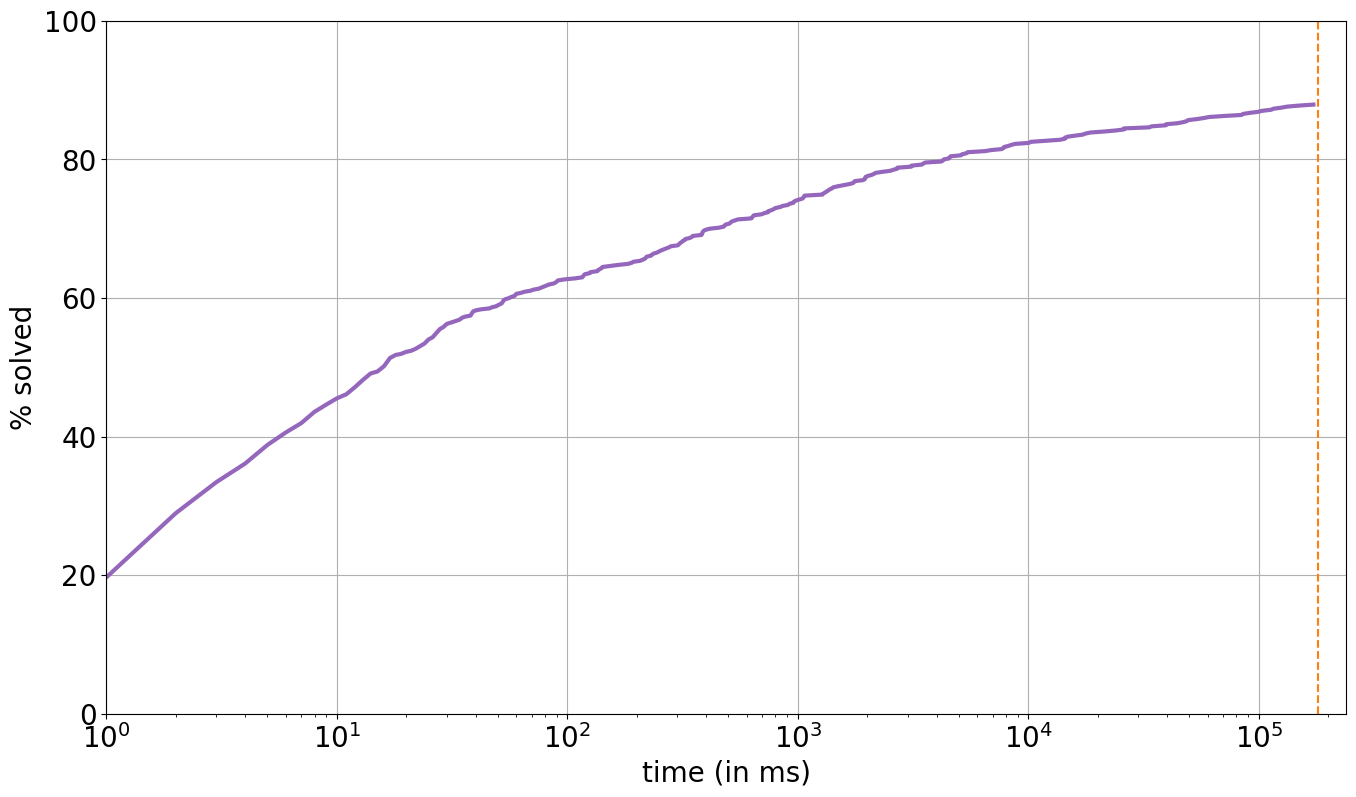

In [7]:
dfPercentage = df[df['millis'] < 180000].groupby('millis').mean()
dfPercentage['percentage_solved'] = 0.0

for index, row in dfPercentage.iterrows():
    dfPercentage.at[index, 'percentage_solved'] = df[df['millis'] < index].shape[0] / df.shape[0] * 100

print(dfPercentage)


plt.figure(figsize=(16,9))
plt.axvline(x=180000, color='tab:orange', linestyle='--')
plt.plot(dfPercentage['percentage_solved'], c='tab:purple', linewidth='3')
plt.xlabel('time (in ms)')
plt.ylabel('% solved')
plt.title('')
plt.ylim([0, 100])
plt.xlim([1, 240000])
plt.gca().set_xscale('log')
plt.grid()
plt.savefig('plots/PercentageLinePlot.png',  bbox_inches='tight')
plt.show()

# Scatter Plot k

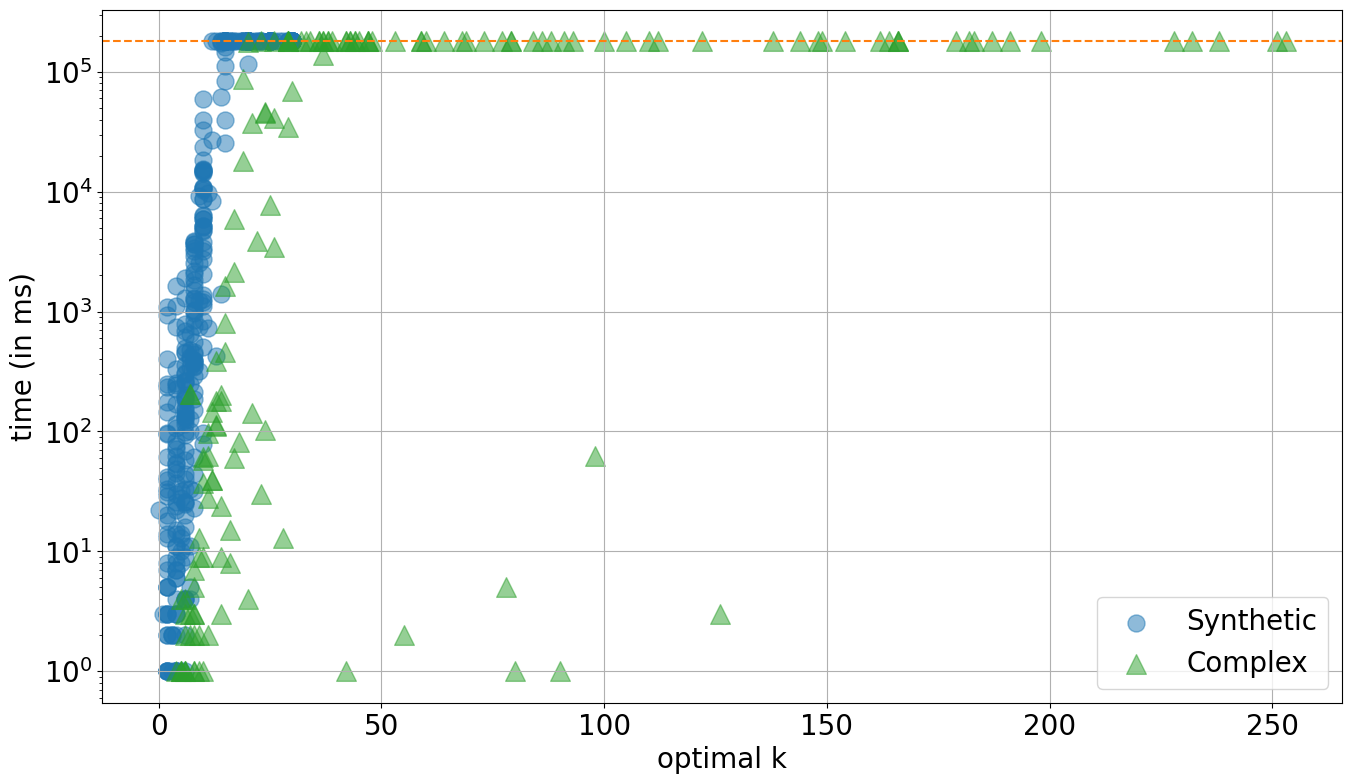

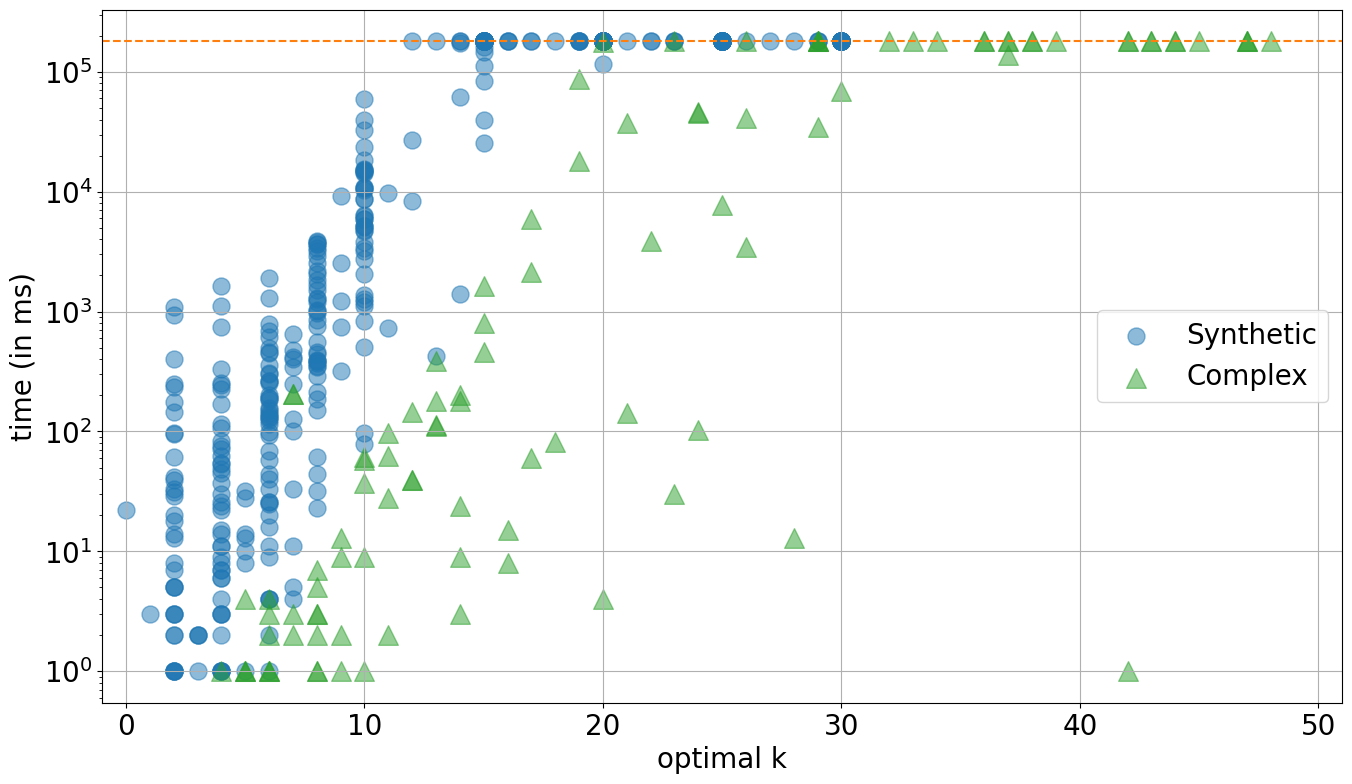

In [43]:
plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_synthetic['k_optimal'], df_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_complex['k_optimal'], df_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.savefig('plots/SyntheticComplexScatterPlot_1.png',  bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_synthetic['k_optimal'], df_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_complex['k_optimal'], df_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.xlim([-1, 51])
plt.savefig('plots/SyntheticComplexScatterPlot_2.png',  bbox_inches='tight')
plt.show()